<a href="https://colab.research.google.com/github/josephjvalavi/miniproject/blob/main/naivebayesmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import seaborn as sb
import nltk
import re
import warnings
from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score, classification_report
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [3]:
df=pd.read_csv("/content/bbc-text.csv.zip")

In [4]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

label encoding

In [31]:
label_encoder=preprocessing.LabelEncoder()
df["category_encoded"]=label_encoder.fit_transform(df['category'])
print(label_encoder.classes_)
df.head()

['business' 'entertainment' 'politics' 'sport' 'tech']


,category,text,category_encoded,text_parsed
0,tech,tv future in the hands of viewers with home th...,4,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,0,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,3,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,3,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,1,ocean twelve raids box office ocean twelve cri...


TEXT PREPROSSING

In [6]:

def process_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower().replace('\n',' ').replace('\r','').strip()
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]','',text)

    tokens=word_tokenize(text)
    filtered_sentence=[]
    for f in tokens:
      if f not in stop_words:
        filtered_sentence.append(f) 
    text = " ".join(filtered_sentence)
    return(text)


In [7]:
text="Brendan Taylor Admits To Being Approached By Bookies, Says ICC Will? Impose Multi-Year Ban On Him"

text_parsed=process_text(text)


In [8]:
df['text_parsed']=df['text'].apply(process_text)
df.head()

,category,text,category_encoded,text_parsed
0,tech,tv future in the hands of viewers with home th...,4,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldc...,0,worldcom boss left books alone former worldcom...
2,sport,tigers wary of farrell gamble leicester say ...,3,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle in fa cup premiership s...,3,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,1,ocean twelve raids box office ocean twelve cri...


TFIDF VECTORIZER

In [9]:
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features=300
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)

In [10]:
X=  tfidf.fit_transform(df["text_parsed"]).toarray()
print(X)
y=df["category_encoded"]
print(y)


[[0.07199503 0.         0.         ... 0.         0.         0.10580018]
 [0.12758554 0.         0.16367708 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.14676836 0.         0.        ]
 ...
 [0.13821124 0.15165403 0.         ... 0.         0.         0.        ]
 [0.08376321 0.         0.         ... 0.09314834 0.         0.        ]
 [0.         0.         0.         ... 0.13041569 0.14235608 0.        ]]
0       4
1       0
2       3
3       3
4       1
       ..
2220    0
2221    2
2222    1
2223    2
2224    3
Name: category_encoded, Length: 2225, dtype: int64


traintest split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=8)
print(X_train)
print(X_test)

[[0.         0.20322455 0.         ... 0.         0.         0.        ]
 [0.         0.         0.3058487  ... 0.09248102 0.         0.12221223]
 [0.20100217 0.10509429 0.         ... 0.         0.06866601 0.19837261]
 ...
 [0.         0.11569346 0.         ... 0.         0.19725067 0.        ]
 [0.132264   0.         0.         ... 0.         0.         0.        ]
 [0.11969927 0.         0.         ... 0.07861739 0.         0.        ]]
[[0.         0.13540737 0.         ... 0.         0.08847183 0.18134918]
 [0.         0.         0.         ... 0.10236323 0.         0.        ]
 [0.10157315 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.13491447 0.         0.        ]
 [0.         0.         0.13771886 ... 0.         0.13030918 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


0.952808988764045
0.953132184009192
[3 2 4 2 1 2 2 1 1 4 0 4 2 3 2 3 0 3 0 3 0 3 3 2 0 3 2 1 0 2 0 4 3 0 3 2 0
 0 1 0 0 0 0 3 3 1 3 3 4 1 2 0 1 3 0 0 1 3 3 2 1 2 3 2 4 3 1 0 0 1 0 3 1 3
 4 0 1 0 2 3 1 1 1 0 0 0 2 1 1 0 1 3 0 4 3 3 4 0 3 0 0 1 2 2 1 0 2 4 4 1 4
 3 1 1 4 4 2 0 4 1 3 4 0 1 1 1 1 3 4 2 0 4 0 0 1 3 1 4 0 0 2 1 2 2 0 3 4 1
 3 2 3 0 2 2 0 3 0 0 2 1 3 3 0 1 4 2 2 0 3 2 4 4 3 1 4 4 2 2 1 0 0 2 2 3 4
 1 3 3 4 0 0 3 3 2 4 4 4 2 1 3 3 2 2 0 3 3 3 4 0 0 2 4 3 4 1 0 0 0 4 0 1 0
 3 0 1 0 3 3 4 3 0 4 2 1 3 1 0 0 3 4 4 3 3 4 1 0 1 4 3 3 1 1 2 2 1 1 4 3 3
 0 3 1 3 3 1 3 2 3 3 3 4 4 4 0 0 2 2 4 1 2 2 3 4 4 2 2 1 0 2 2 1 1 1 3 1 3
 2 0 0 4 0 2 0 4 2 0 3 3 1 0 3 0 1 0 2 4 2 3 4 2 3 4 2 2 4 4 3 0 0 0 0 0 0
 1 2 0 0 1 0 4 1 1 0 2 1 0 4 0 3 1 2 3 2 1 2 3 1 4 3 2 4 0 3 3 3 1 3 2 3 0
 4 1 1 1 3 3 2 0 2 4 0 2 3 0 4 2 3 0 0 0 3 0 4 0 0 1 0 3 2 3 4 4 0 1 2 3 4
 0 4 2 0 4 4 1 3 2 3 1 0 4 3 1 0 3 1 4 0 3 3 0 4 0 0 4 2 1 3 3 1 4 4 2 4 0
 1]
[[101   0   3   1   0]
 [  2  79   0   2   2]
 [  2   0  74 

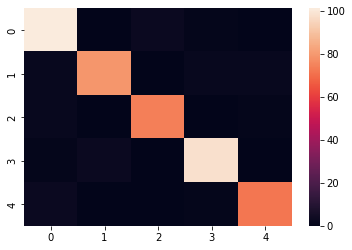

In [27]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
mnb_predictions = mnb.predict(X_test)
print(accuracy_score(y_test,mnb_predictions))
print(precision_score(y_test,mnb_predictions,average='weighted'))
print(mnb_predictions)
print(confusion_matrix(y_test,mnb_predictions))
print(classification_report(y_test,mnb_predictions))
sb.heatmap(confusion_matrix(y_test,mnb_predictions))

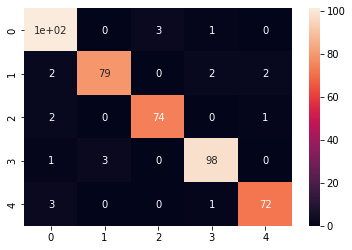

In [28]:
sb.heatmap(confusion_matrix(y_test,mnb_predictions),annot=True)